# CS452/552 – Data Science with Python Assignment-1
# Life Expectancy by Linear Regression

In [1]:
#Importing data manipulations libraries
import pandas as pd
import numpy as np 
import random

#Importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Linear Regression libraries and modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import r2_score

#Setting “random seed” parameter as 147
np.random.seed(147)
random.seed(147)

pd.set_option('display.max_columns', 60)

data = pd.read_csv("assignment-1-data.csv") #Reading data from csv file and put it into DataFrame
data_np = np.array(data) #Converting data to numpy array

data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Number of instances = 2938

# Overall Statistics

In [2]:
# Statistical description of data
data.describe().round(1)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.0,2928.0,2928.0,2938.0,2744.0,2938.0,2385.0,2938.0,2904.0,2938.0,2919.0,2712.0,2919.0,2938.0,2490.0,2.286000e+03,2904.0,2904.0,2771.0,2775.0
mean,2007.5,69.2,164.8,30.3,4.6,738.3,80.9,2419.6,38.3,42.0,82.6,5.9,82.3,1.7,7483.2,1.275338e+07,4.8,4.9,0.6,12.0
std,4.6,9.5,124.3,117.9,4.1,1987.9,25.1,11467.3,20.0,160.4,23.4,2.5,23.7,5.1,14270.2,6.101210e+07,4.4,4.5,0.2,3.4
min,2000.0,36.3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.4,2.0,0.1,1.7,3.400000e+01,0.1,0.1,0.0,0.0
25%,2004.0,63.1,74.0,0.0,0.9,4.7,77.0,0.0,19.3,0.0,78.0,4.3,78.0,0.1,463.9,1.957932e+05,1.6,1.5,0.5,10.1
50%,2008.0,72.1,144.0,3.0,3.8,64.9,92.0,17.0,43.5,4.0,93.0,5.8,93.0,0.1,1766.9,1.386542e+06,3.3,3.3,0.7,12.3
75%,2012.0,75.7,228.0,22.0,7.7,441.5,97.0,360.2,56.2,28.0,97.0,7.5,97.0,0.8,5910.8,7.420359e+06,7.2,7.2,0.8,14.3
max,2015.0,89.0,723.0,1800.0,17.9,19479.9,99.0,212183.0,87.3,2500.0,99.0,17.6,99.0,50.6,119172.7,1.293859e+09,27.7,28.6,0.9,20.7


In [3]:
#Number of missing(null) values in each row.
data.isnull().sum().sort_values(ascending=False) 

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 thinness 5-9 years                 34
 thinness  1-19 years               34
 BMI                                34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
 HIV/AIDS                            0
Country                              0
Year                                 0
Measles                              0
percentage expenditure               0
infant deaths                        0
Status                               0
under-five deaths                    0
dtype: int64

In [4]:
print(data.shape)
data.drop_duplicates(inplace=True) #removing duplicate values
print(data.shape)
# No duplicate exist

(2938, 22)
(2938, 22)


In [5]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
#Dropping Country column, because, its not relevant
data.drop("Country", axis=1, inplace=True)
data

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [7]:
data.sample(10)

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1234,2015,Developing,68.9,182.0,32,NaN,0.000000,56.0,1433,59.1,38,63.0,NaN,58.0,0.1,4974.269300,36115649.00,5.3,5.1,0.649,10.1
1827,2001,Developing,63.2,23.0,43,0.09,21.928139,NaN,10849,11.9,58,73.0,5.36,72.0,0.1,248.618354,24161777.00,18.3,19.0,0.446,9.0
337,2014,Developing,65.1,268.0,2,0.01,662.802194,95.0,1,37.3,2,96.0,5.41,95.0,2.3,7497.762376,2168573.00,6.7,6.4,0.697,12.6
2422,2002,Developing,52.0,382.0,30,NaN,0.000000,NaN,0,NaN,48,NaN,NaN,NaN,3.3,NaN,7237276.00,NaN,NaN,0.000,0.0
2402,2006,Developing,54.0,496.0,54,8.50,732.125530,83.0,81,44.3,82,79.0,7.57,82.0,28.1,5631.734850,4823384.48,1.6,12.8,0.609,12.9
1663,2003,Developing,63.0,226.0,8,0.01,29.653709,NaN,3611,22.9,12,75.0,4.53,76.0,1.3,528.586613,2957117.00,1.3,1.1,0.447,6.6
1599,2002,Developing,72.9,14.0,4,0.49,216.702948,95.0,408,27.9,4,94.0,3.40,94.0,0.1,4167.364387,24198811.00,9.5,9.3,0.723,12.0
785,2000,Developing,72.0,176.0,7,6.58,44.792478,68.0,253,43.1,9,71.0,5.90,78.0,2.5,282.424200,8562622.00,3.8,3.7,0.651,12.2
331,2004,Developing,75.5,99.0,0,4.25,3.479919,36.0,28,49.9,0,87.0,9.40,84.0,0.1,265.642661,3781287.00,3.0,3.0,0.000,12.3
1027,2014,Developing,88.0,73.0,0,7.53,2163.043414,96.0,1,66.0,0,99.0,8.80,99.0,0.1,21673.781700,1892413.00,0.8,0.7,0.862,17.2


In [8]:
data.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
data.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

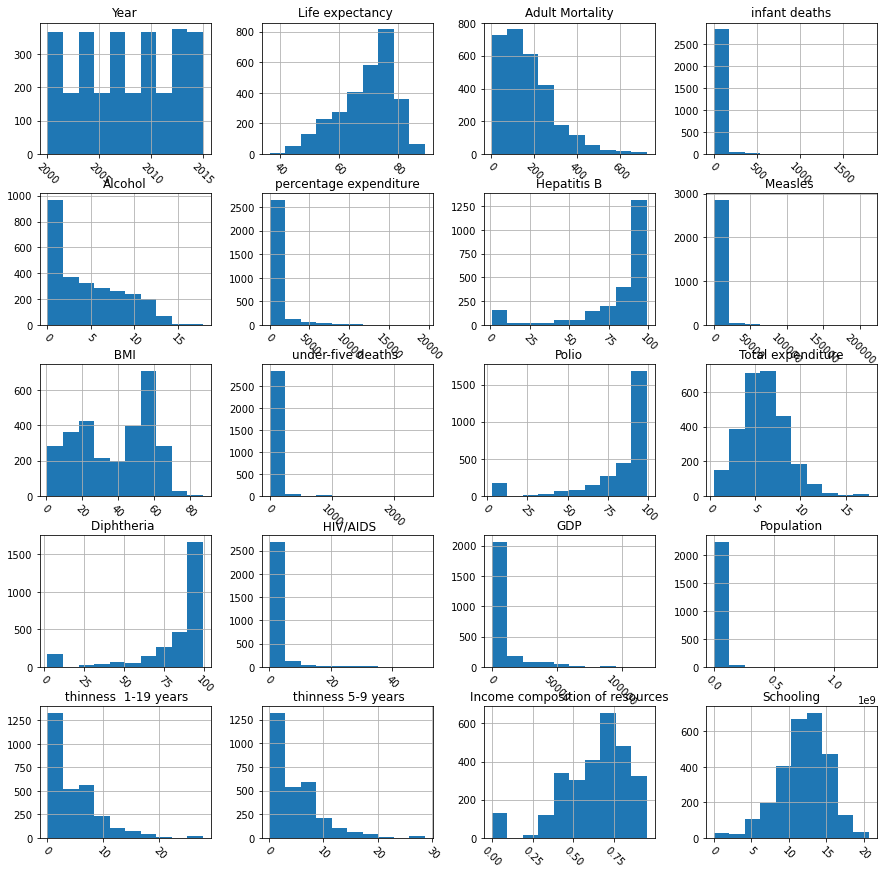

In [11]:
data.hist(figsize=(15,15), xrot=-45)
plt.show()

In [12]:
data.isnull().sum().sort_values(ascending=False)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 thinness 5-9 years                 34
 thinness  1-19 years               34
 BMI                                34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
Year                                 0
 HIV/AIDS                            0
Status                               0
Measles                              0
percentage expenditure               0
infant deaths                        0
under-five deaths                    0
dtype: int64

## Filling missing values from the data set with related mean value

In [13]:
#Dropping missing values from the data set
#data.dropna(inplace=True) 

#Using SimpleImputer for filling missing values
'''
from sklearn.impute import SimpleImputer
impute_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
impute_mean.fit(data)
'''

data["Population"]=data["Population"].fillna(data["Population"].mean())
data["Hepatitis B"]=data["Hepatitis B"].fillna(data["Hepatitis B"].mean())
data["GDP"]=data["GDP"].fillna(data["GDP"].mean())
data["Total expenditure"]=data["Total expenditure"].fillna(data["Total expenditure"].mean())
data["Alcohol"]=data["Alcohol"].fillna(data["Alcohol"].mean())
data["Income composition of resources"]=data["Income composition of resources"].fillna(data["Income composition of resources"].mean())
data["Schooling"]=data["Schooling"].fillna(data["Schooling"].mean())
data[" thinness 5-9 years"]=data[" thinness 5-9 years"].fillna(data[" thinness 5-9 years"].mean())
data[" thinness  1-19 years"]=data[" thinness  1-19 years"].fillna(data[" thinness  1-19 years"].mean())
data[" BMI "]=data[" BMI "].fillna(data[" BMI "].mean())
data["Diphtheria "]=data["Diphtheria "].fillna(data["Diphtheria "].mean())
data["Polio"]=data["Polio"].fillna(data["Polio"].mean())
data["Life expectancy "]=data["Life expectancy "].fillna(data["Life expectancy "].mean()) #?
data["Adult Mortality"]=data["Adult Mortality"].fillna(data["Adult Mortality"].mean())
data

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [14]:
data.isnull().sum().sort_values(ascending=False)

Year                               0
Polio                              0
Income composition of resources    0
 thinness 5-9 years                0
 thinness  1-19 years              0
Population                         0
GDP                                0
 HIV/AIDS                          0
Diphtheria                         0
Total expenditure                  0
under-five deaths                  0
Status                             0
 BMI                               0
Measles                            0
Hepatitis B                        0
percentage expenditure             0
Alcohol                            0
infant deaths                      0
Adult Mortality                    0
Life expectancy                    0
Schooling                          0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2938 non-null   float64
 3   Adult Mortality                  2938 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2938 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 12  Total expenditure   

In [16]:
data.describe().round(1)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.0,2938.0,2938.0,2938.0,2938.0,2938.0,2938.0,2938.0,2938.0,2938.0,2938.0,2938.0,2938.0,2938.0,2938.0,2.938000e+03,2938.0,2938.0,2938.0,2938.0
mean,2007.5,69.2,164.8,30.3,4.6,738.3,80.9,2419.6,38.3,42.0,82.6,5.9,82.3,1.7,7483.2,1.275338e+07,4.8,4.9,0.6,12.0
std,4.6,9.5,124.1,117.9,3.9,1987.9,22.6,11467.3,19.9,160.4,23.4,2.4,23.6,5.1,13136.8,5.381546e+07,4.4,4.5,0.2,3.3
min,2000.0,36.3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.4,2.0,0.1,1.7,3.400000e+01,0.1,0.1,0.0,0.0
25%,2004.0,63.2,74.0,0.0,1.1,4.7,80.9,0.0,19.4,0.0,78.0,4.4,78.0,0.1,580.5,4.189172e+05,1.6,1.6,0.5,10.3
50%,2008.0,72.0,144.0,3.0,4.2,64.9,87.0,17.0,43.0,4.0,93.0,5.9,93.0,0.1,3116.6,3.675929e+06,3.4,3.4,0.7,12.1
75%,2012.0,75.6,227.0,22.0,7.4,441.5,96.0,360.2,56.1,28.0,97.0,7.3,97.0,0.8,7483.2,1.275338e+07,7.1,7.2,0.8,14.1
max,2015.0,89.0,723.0,1800.0,17.9,19479.9,99.0,212183.0,87.3,2500.0,99.0,17.6,99.0,50.6,119172.7,1.293859e+09,27.7,28.6,0.9,20.7


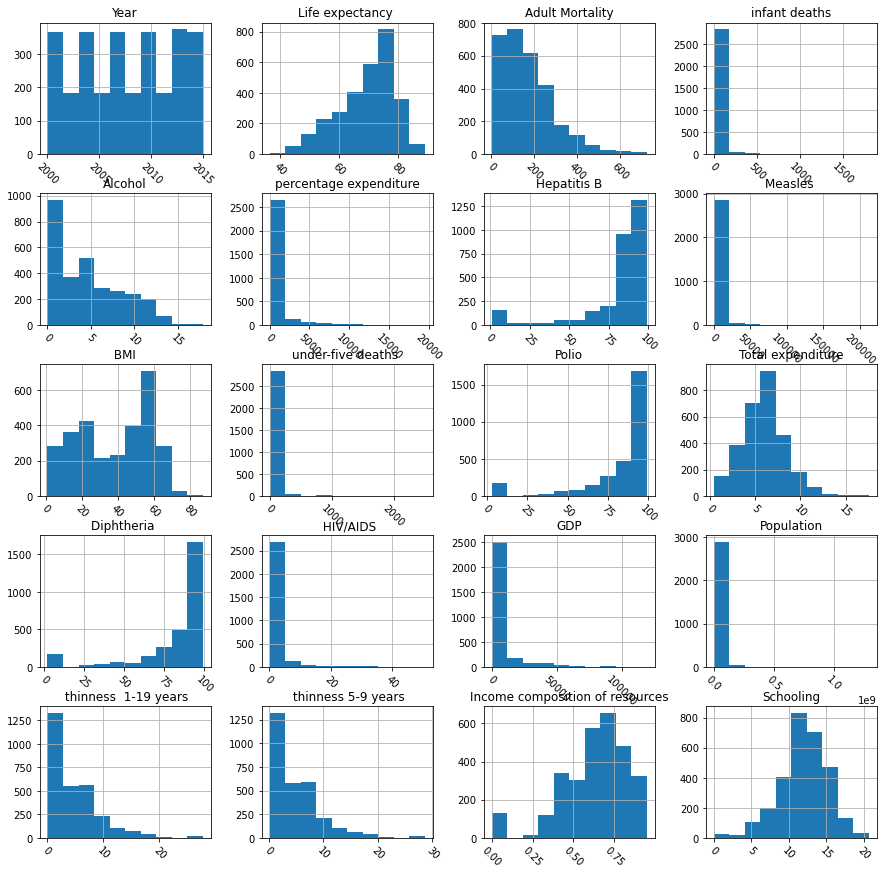

In [17]:
data.hist(figsize=(15,15), xrot=-45)
plt.show()

# Pearson Correlation 

In [18]:
corr = data.corr(method="pearson")
corr

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
Hepatitis B,0.089398,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609
BMI,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,-0.188703,-0.128269,-0.195651,0.038062,-0.110640,0.535864,0.467626,0.472099,-0.161533,-0.207111


# Ordering Correlation between Life Expectancy and other features

The most 5 is Schooling, Income composition of resources, BMI,  GDP, percentage expenditure 

In [19]:
corr_df = pd.DataFrame(corr)
corr_df["Life expectancy "].sort_values(ascending=False).round(2)

Life expectancy                    1.00
Schooling                          0.72
Income composition of resources    0.69
 BMI                               0.56
Diphtheria                         0.48
Polio                              0.46
GDP                                0.43
Alcohol                            0.39
percentage expenditure             0.38
Total expenditure                  0.21
Hepatitis B                        0.20
Year                               0.17
Population                        -0.02
Measles                           -0.16
infant deaths                     -0.20
under-five deaths                 -0.22
 thinness 5-9 years               -0.47
 thinness  1-19 years             -0.47
 HIV/AIDS                         -0.56
Adult Mortality                   -0.70
Name: Life expectancy , dtype: float64

# Ordering Correlation with absolute values

In [20]:
corr_df["Life expectancy "].abs().sort_values(ascending=False).round(2)

Life expectancy                    1.00
Schooling                          0.72
Adult Mortality                    0.70
Income composition of resources    0.69
 BMI                               0.56
 HIV/AIDS                          0.56
Diphtheria                         0.48
 thinness  1-19 years              0.47
 thinness 5-9 years                0.47
Polio                              0.46
GDP                                0.43
Alcohol                            0.39
percentage expenditure             0.38
under-five deaths                  0.22
Total expenditure                  0.21
Hepatitis B                        0.20
infant deaths                      0.20
Year                               0.17
Measles                            0.16
Population                         0.02
Name: Life expectancy , dtype: float64

In [21]:
categorical_columns = ['Status','Year']
numerical_columns = ['Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

for columns in categorical_columns:
    data[columns] = data[columns].astype('category')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Year                             2938 non-null   category
 1   Status                           2938 non-null   category
 2   Life expectancy                  2938 non-null   float64 
 3   Adult Mortality                  2938 non-null   float64 
 4   infant deaths                    2938 non-null   int64   
 5   Alcohol                          2938 non-null   float64 
 6   percentage expenditure           2938 non-null   float64 
 7   Hepatitis B                      2938 non-null   float64 
 8   Measles                          2938 non-null   int64   
 9    BMI                             2938 non-null   float64 
 10  under-five deaths                2938 non-null   int64   
 11  Polio                            2938 non-null   float64 
 12  Total 

# Statistical Data

In [22]:
data.describe().round(2)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2.938000e+03,2938.00,2938.00,2938.00,2938.00
mean,69.22,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,1.275338e+07,4.84,4.87,0.63,11.99
std,9.51,124.08,117.93,3.92,1987.91,22.59,11467.27,19.93,160.45,23.35,2.40,23.64,5.08,13136.80,5.381546e+07,4.39,4.48,0.20,3.26
min,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,3.400000e+01,0.10,0.10,0.00,0.00
25%,63.20,74.00,0.00,1.09,4.69,80.94,0.00,19.40,0.00,78.00,4.37,78.00,0.10,580.49,4.189172e+05,1.60,1.60,0.50,10.30
50%,72.00,144.00,3.00,4.16,64.91,87.00,17.00,43.00,4.00,93.00,5.94,93.00,0.10,3116.56,3.675929e+06,3.40,3.40,0.66,12.10
75%,75.60,227.00,22.00,7.39,441.53,96.00,360.25,56.10,28.00,97.00,7.33,97.00,0.80,7483.16,1.275338e+07,7.10,7.20,0.77,14.10
max,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1.293859e+09,27.70,28.60,0.95,20.70


# probability density function of Life expectancy

<AxesSubplot:ylabel='Density'>

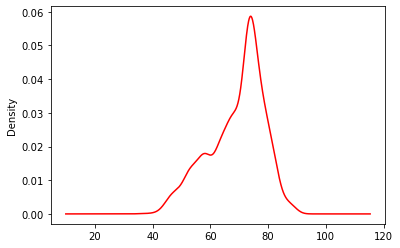

In [23]:
data["Life expectancy "].plot(kind="density", color="Red") # probability density function 

# Target Variable: Life expectancy vs other features

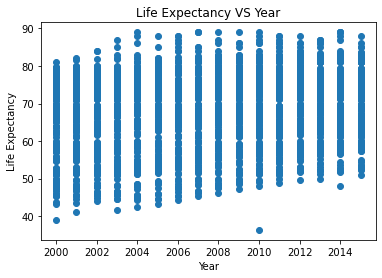

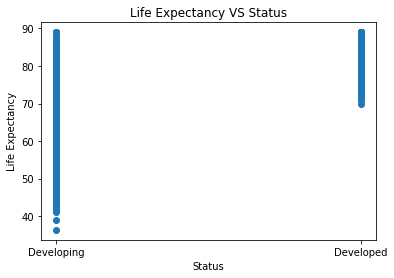

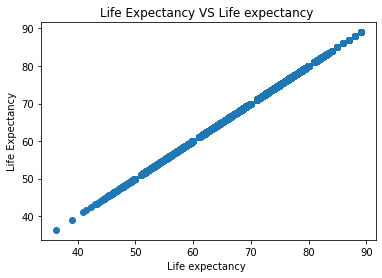

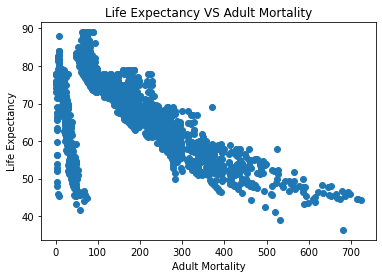

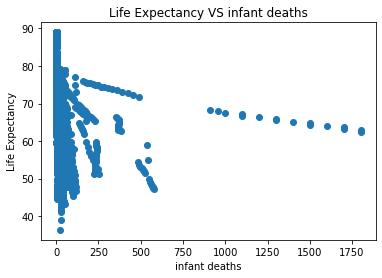

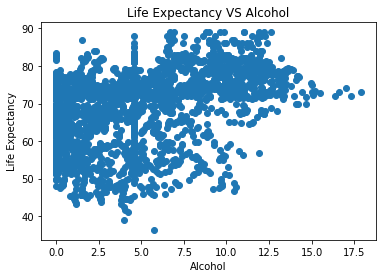

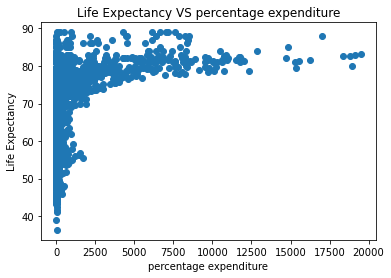

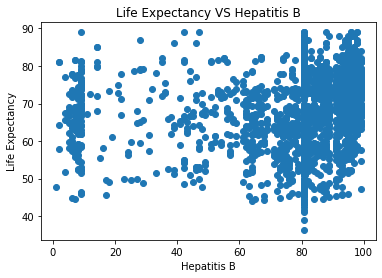

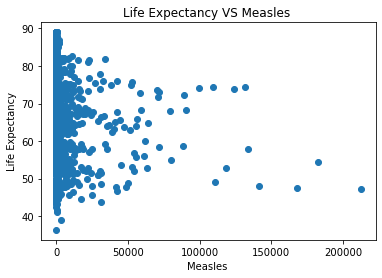

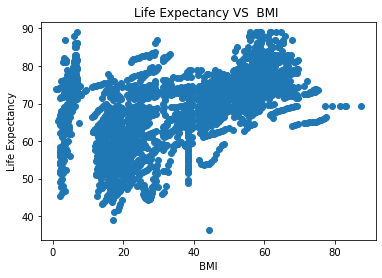

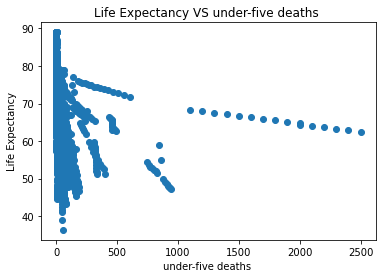

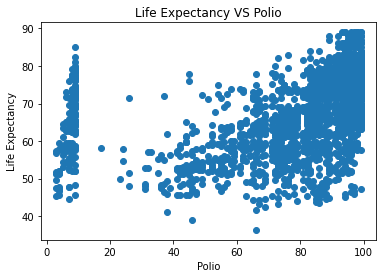

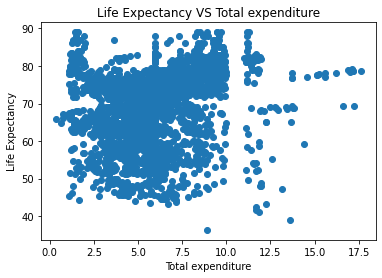

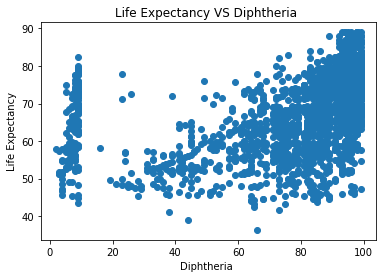

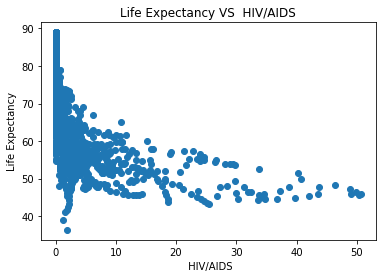

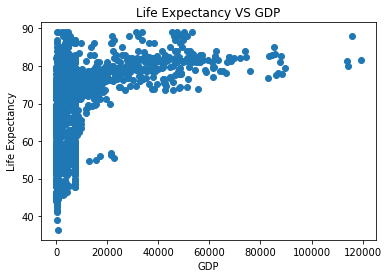

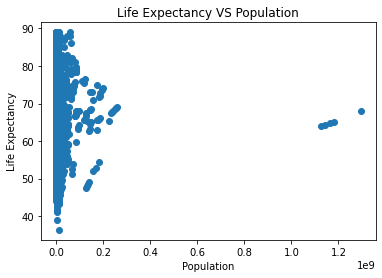

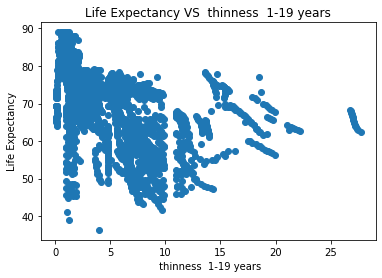

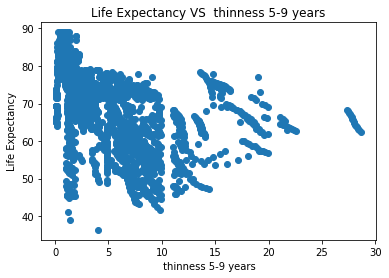

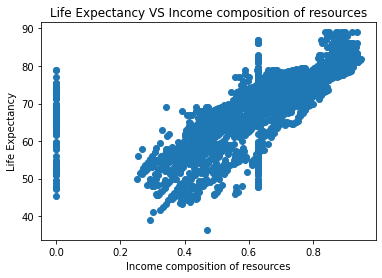

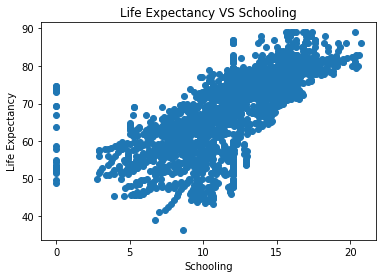

In [24]:
life_exp = data["Life expectancy "]
for i in data.columns:
    plt.scatter(data[i], life_exp)
    plt.xlabel(str(i))
    plt.ylabel("Life Expectancy")
    plt.title("Life Expectancy VS " +str(i) )
    plt.show()

# Mean of particular data


In [25]:
Schooling_mean = data.groupby('Schooling').mean()
Schooling_mean

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources
Schooling,,,,,,,,,,,,,,,,,,
0.0,63.333924,240.914032,11.642857,3.892910,248.688392,79.028901,5.571429,40.658347,18.214286,82.207251,6.565717,81.828048,1.585714,4915.393614,5.391834e+06,3.787027,3.777624,0.044825
2.8,50.000000,284.000000,58.000000,0.100000,13.357838,80.940461,21319.000000,13.600000,128.000000,41.000000,6.100000,34.000000,1.500000,158.455972,1.135297e+07,12.800000,12.900000,0.253000
2.9,55.625000,303.250000,29.500000,0.625000,50.963428,80.940461,23263.500000,21.250000,63.750000,45.000000,6.192500,43.500000,2.900000,473.123654,3.308633e+06,9.475000,9.350000,0.310000
3.0,52.100000,28.000000,56.000000,0.100000,20.268766,80.940461,54190.000000,14.600000,121.000000,44.000000,6.230000,41.000000,1.600000,215.854800,1.265687e+06,12.300000,12.200000,0.266000
3.1,52.900000,279.000000,56.000000,0.110000,20.861184,80.940461,63057.000000,15.000000,118.000000,45.000000,6.610000,43.000000,1.600000,232.566157,1.312712e+06,12.100000,12.000000,0.270000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20.3,83.425000,66.250000,0.750000,10.025000,6291.299425,72.500000,52.750000,63.450000,1.250000,92.000000,9.375000,92.000000,0.100000,35254.671403,8.980414e+06,0.575000,0.525000,0.914250
20.4,81.666667,47.666667,1.000000,8.160954,3705.516803,88.313487,174.000000,63.633333,1.333333,64.666667,8.052730,64.666667,0.100000,40312.999933,8.718395e+06,0.633333,0.633333,0.923333
20.5,79.900000,75.000000,1.000000,9.530000,3064.301144,94.000000,141.000000,59.000000,2.000000,91.000000,8.180000,92.000000,0.100000,19517.841680,1.941300e+04,0.700000,0.700000,0.899000


In [26]:
status_mean = data.groupby('Status').mean()
status_mean

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Status,,,,,,,,,,,,,,,,,,,
Developed,79.197852,79.685547,1.494141,9.541055,2703.600380,85.641992,499.005859,51.803906,1.810547,93.736328,7.453051,93.476562,0.100000,20232.107949,7.940676e+06,1.320703,1.296680,0.831401,15.484285
Developing,67.120177,182.758848,36.384171,3.560670,323.470285,79.948217,2824.926216,35.475772,50.525144,80.189387,5.618483,79.970386,2.088664,4792.531044,1.376908e+07,5.582378,5.624522,0.584529,11.255924


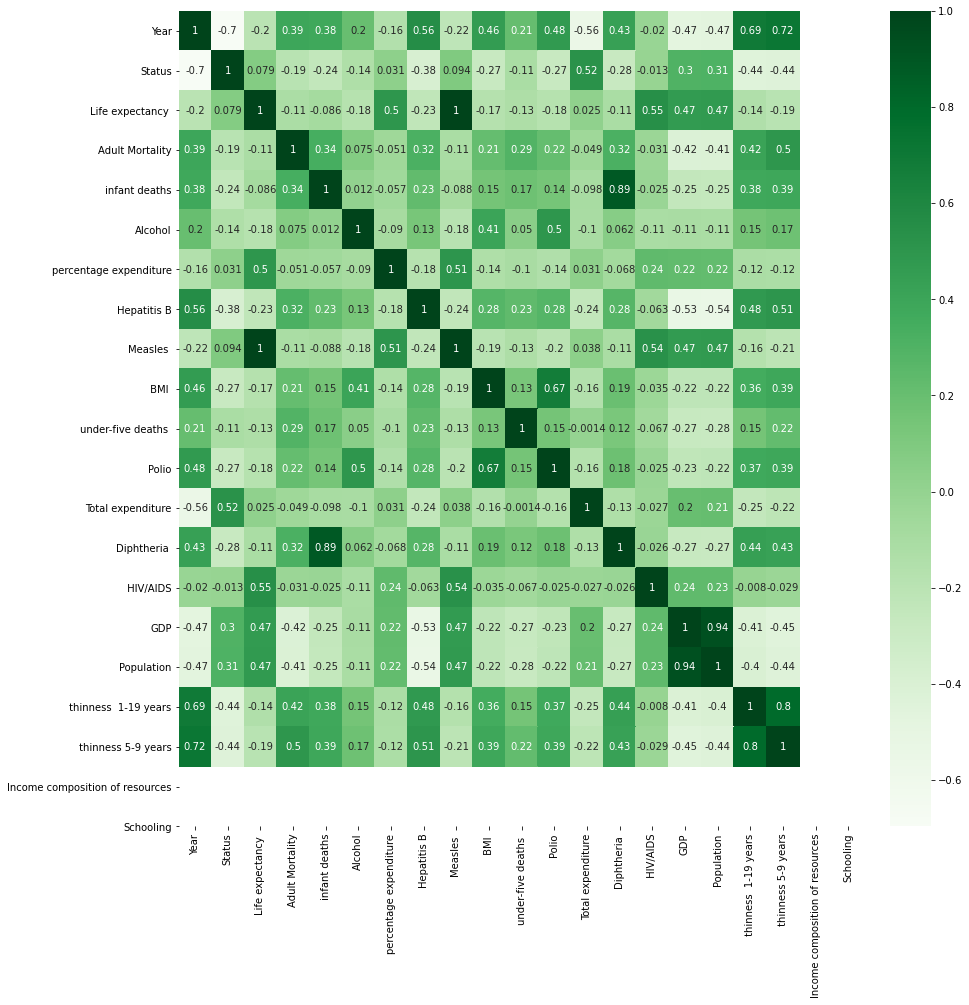

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), xticklabels = data.columns, yticklabels = data.columns, cmap='Greens', cbar=True, annot=True)
plt.show()

# 5 groups of 8 Features


In [28]:
#Top of correlation
group1 = ['Schooling', 'Income composition of resources', ' BMI ',  'GDP', 'percentage expenditure', 'Alcohol',  'Diphtheria ', 'Polio']
#Bottom of correlation
group2 = ['Adult Mortality', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years', 'under-five deaths ', 'infant deaths', 'Measles ', 'Population']
# 4 Top of Top and 4 Top of Bottom
group3 = ['Schooling', 'Adult Mortality', 'Income composition of resources', ' HIV/AIDS', ' BMI ', ' thinness  1-19 years', 'GDP', 'under-five deaths ']
# 4 Bottom of Top and 4 Bottom of Bottom
group4 = ['percentage expenditure', 'Alcohol',  'Diphtheria ', 'Polio', 'under-five deaths ', 'infant deaths', 'Measles ', 'Population']
# Randomized List
group5 = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', ' BMI ', 'under-five deaths ', 'Total expenditure','Schooling']



# Data Preprocessing

In [29]:
clean_data = data.copy()

#Category for Status
clean_data.Status = clean_data.Status.map({'Developed': 1, 'Developing': 0})
print(clean_data.Status.nunique())

#Category for Years
#clean_data.Year = clean_data.Year.map({'2000': 0, '2001': 1, '2002': 2, '2003': 3, '2004': 4, '2005': 5, '2006': 6, '2007': 7, '2008': 8, '2009': 9, '2009': 10, '2010': 11, '2011': 12, '2012': 13, '2013': 14, '2014': 15, '2015': 16})
#print(clean_data.Year.nunique())

2


In [30]:
clean_data.isna().sum().sort_values(ascending=False).head(10)

Year                               0
Polio                              0
Income composition of resources    0
 thinness 5-9 years                0
 thinness  1-19 years              0
Population                         0
GDP                                0
 HIV/AIDS                          0
Diphtheria                         0
Total expenditure                  0
dtype: int64

In [31]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Year                             2938 non-null   category
 1   Status                           2938 non-null   category
 2   Life expectancy                  2938 non-null   float64 
 3   Adult Mortality                  2938 non-null   float64 
 4   infant deaths                    2938 non-null   int64   
 5   Alcohol                          2938 non-null   float64 
 6   percentage expenditure           2938 non-null   float64 
 7   Hepatitis B                      2938 non-null   float64 
 8   Measles                          2938 non-null   int64   
 9    BMI                             2938 non-null   float64 
 10  under-five deaths                2938 non-null   int64   
 11  Polio                            2938 non-null   float64 
 12  Total 

# Data Splitting and Standardization for Group-1

In [32]:
x1 = data[group1]
y = clean_data["Life expectancy "]

In [33]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=147)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)

In [34]:
x1

,Schooling,Income composition of resources,BMI,GDP,percentage expenditure,Alcohol,Diphtheria,Polio
0,10.1,0.479,19.1,584.259210,71.279624,0.01,65.0,6.0
1,10.0,0.476,18.6,612.696514,73.523582,0.01,62.0,58.0
2,9.9,0.470,18.1,631.744976,73.219243,0.01,64.0,62.0
3,9.8,0.463,17.6,669.959000,78.184215,0.01,67.0,67.0
4,9.5,0.454,17.2,63.537231,7.097109,0.01,68.0,68.0
...,...,...,...,...,...,...,...,...
2933,9.2,0.407,27.1,454.366654,0.000000,4.36,65.0,67.0
2934,9.5,0.418,26.7,453.351155,0.000000,4.06,68.0,7.0
2935,10.0,0.427,26.3,57.348340,0.000000,4.43,71.0,73.0
2936,9.8,0.427,25.9,548.587312,0.000000,1.72,75.0,76.0


In [35]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

In [36]:
x1_train

array([[0.46859903, 0.51534392, 0.21784473, ..., 0.12821948, 0.29896907,
        0.30208333],
       [0.53623188, 0.60740741, 0.26303592, ..., 0.23404255, 0.93814433,
        0.94791667],
       [0.60869565, 0.83597884, 0.73580533, ..., 0.25715906, 0.95876289,
        0.95833333],
       ...,
       [0.77294686, 0.99259259, 0.65353418, ..., 0.25715906, 0.97938144,
        0.97916667],
       [0.43961353, 0.46984127, 0.2433372 , ..., 0.07110862, 0.75257732,
        0.77083333],
       [0.57936197, 0.6640752 , 0.20973349, ..., 0.10078387, 0.04123711,
        0.76041667]])

In [37]:
x1_test

array([[0.48792271, 0.68677249, 0.67323291, ..., 0.25715906, 0.57731959,
        0.625     ],
       [0.43478261, 0.47195767, 0.12630359, ..., 0.00447928, 0.72164948,
        0.72916667],
       [0.60869565, 0.73756614, 0.42062572, ..., 0.        , 0.95876289,
        0.96875   ],
       ...,
       [0.61352657, 0.82328042, 0.52143685, ..., 0.38801792, 0.92783505,
        0.94791667],
       [0.73429952, 0.        , 0.67323291, ..., 0.11030235, 0.77319588,
        0.77083333],
       [0.58937198, 0.74391534, 0.55156431, ..., 0.26259798, 0.82474227,
        0.82291667]])

In [38]:
y_train

622     52.7
459     71.4
160     76.1
1303    75.0
1868    72.5
        ... 
2443    74.6
2078    76.8
2521    83.4
279     57.6
726     57.4
Name: Life expectancy , Length: 2350, dtype: float64

In [39]:
y_test

1234    68.9
1827    63.2
337     65.1
2422    52.0
2402    54.0
        ... 
320     77.4
1825    64.3
2650    71.1
1471    73.2
988     73.9
Name: Life expectancy , Length: 588, dtype: float64

# Linear Regression for Group-1

In [40]:
model1=LinearRegression() #initialize the linear regression model
model1.fit(x1_train, y_train) #fit the training data to the model (training)

LinearRegression()

In [41]:
print(model1.coef_) #coeffients of the model
print(model1.intercept_) #intercept of the model

[16.87387197 10.76850843  8.3523457   5.66639815  3.68354898  0.06415439
  5.7515633   3.2557469 ]
40.6703160848197


In [42]:
scaled_x1_test=scaler.transform(x1_test)
scaled_x1_test

array([[ 2.35711452e-02,  7.26743372e-01, -3.78640894e-03, ...,
         1.38386931e-02, -1.46668084e-02, -2.47395833e-02],
       [ 2.10039908e-02,  4.99426108e-01, -1.01239445e-02, ...,
        -3.09110677e-04, -1.31788713e-02, -2.36545139e-02],
       [ 2.94055871e-02,  7.80493267e-01, -6.71349103e-03, ...,
        -5.59910414e-04, -1.07344032e-02, -2.11588542e-02],
       ...,
       [ 2.96389647e-02,  8.71196215e-01, -5.54534359e-03, ...,
         2.11656169e-02, -1.10532469e-02, -2.13758681e-02],
       [ 3.54734066e-02,  0.00000000e+00, -3.78640894e-03, ...,
         5.61603313e-03, -1.26474652e-02, -2.32204861e-02],
       [ 2.84720764e-02,  7.87212004e-01, -5.19624206e-03, ...,
         1.41432242e-02, -1.21160591e-02, -2.26779514e-02]])

In [43]:
y1_predict=model1.predict(x1_test)

In [44]:
y_test=np.array(y_test)

In [45]:
for i in range(len(y1_predict)):
    print("Predicted value of y1: ", y1_predict[i]," Actual Value of y:", y_test[i])
   

Predicted value of y1:  67.53031929847282  Actual Value of y: 68.9
Predicted value of y1:  60.684763728433566  Actual Value of y: 63.2
Predicted value of y1:  71.54721683956777  Actual Value of y: 65.1
Predicted value of y1:  52.115238202069655  Actual Value of y: 52.0
Predicted value of y1:  70.07397484148639  Actual Value of y: 54.0
Predicted value of y1:  60.12386903716869  Actual Value of y: 63.0
Predicted value of y1:  70.07652969543743  Actual Value of y: 72.9
Predicted value of y1:  68.96611262695228  Actual Value of y: 72.0
Predicted value of y1:  63.16885720435309  Actual Value of y: 75.5
Predicted value of y1:  81.27851266661732  Actual Value of y: 88.0
Predicted value of y1:  75.32380318305252  Actual Value of y: 74.8
Predicted value of y1:  73.9870297865566  Actual Value of y: 64.6
Predicted value of y1:  53.40772422880467  Actual Value of y: 55.3
Predicted value of y1:  72.18574240922015  Actual Value of y: 79.3
Predicted value of y1:  55.57918456269928  Actual Value of y:

Predicted value of y1:  65.56888405132742  Actual Value of y: 56.4
Predicted value of y1:  78.36911824535865  Actual Value of y: 85.0
Predicted value of y1:  61.624234922355484  Actual Value of y: 56.7
Predicted value of y1:  78.81893258844465  Actual Value of y: 79.0
Predicted value of y1:  63.85056987171007  Actual Value of y: 58.0
Predicted value of y1:  64.22514774009137  Actual Value of y: 66.7
Predicted value of y1:  68.71383891126132  Actual Value of y: 46.4
Predicted value of y1:  54.22216811439222  Actual Value of y: 58.8
Predicted value of y1:  77.23992033721444  Actual Value of y: 70.0
Predicted value of y1:  73.03473709472132  Actual Value of y: 78.9
Predicted value of y1:  71.09956535557578  Actual Value of y: 69.0
Predicted value of y1:  68.71668244378438  Actual Value of y: 78.9
Predicted value of y1:  62.51247338869892  Actual Value of y: 65.8
Predicted value of y1:  82.49614737019127  Actual Value of y: 81.7
Predicted value of y1:  75.73245116346011  Actual Value of y:

Predicted value of y1:  78.23797213770779  Actual Value of y: 76.4
Predicted value of y1:  72.2211150696841  Actual Value of y: 79.0
Predicted value of y1:  61.822885041336974  Actual Value of y: 68.3
Predicted value of y1:  76.55556537065563  Actual Value of y: 81.4
Predicted value of y1:  59.07215008275976  Actual Value of y: 58.9
Predicted value of y1:  72.75864447207212  Actual Value of y: 75.4
Predicted value of y1:  64.20359581267591  Actual Value of y: 53.5
Predicted value of y1:  53.115260841860035  Actual Value of y: 63.8
Predicted value of y1:  78.68929175371582  Actual Value of y: 82.0
Predicted value of y1:  71.97273150257479  Actual Value of y: 79.7
Predicted value of y1:  77.8395524691262  Actual Value of y: 77.0
Predicted value of y1:  70.68723946075762  Actual Value of y: 65.6
Predicted value of y1:  74.99895998824556  Actual Value of y: 78.8
Predicted value of y1:  71.04165151309297  Actual Value of y: 62.2
Predicted value of y1:  68.25597360180961  Actual Value of y: 

In [46]:
score1=model1.score(x1_test,y_test)
score1

0.6202827389117485

## mean-squared error for Group-1

In [47]:
#calculate the mean squared error of the predicted values.
#lower values are more desired.
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_test,y1_predict)
print(mse1)

35.75455771971103


## mean-absolute error for Group-1

In [48]:
#Calculate the absolute squared error of the predicted values.
from sklearn.metrics import mean_absolute_error
mae1=mean_absolute_error(y_test,y1_predict)
print(mae1)

4.397615087717587


## root-mean-squared error for Group-1

In [49]:
rmse1= np.sqrt(mean_squared_error(y_test,y1_predict))
rmse1

5.979511495073075

## R^2 for Group-1

In [50]:
print("R^2")
print(r2_score(y_test,y1_predict))

R^2
0.6202827389117485


In [51]:
model1.coef_

array([16.87387197, 10.76850843,  8.3523457 ,  5.66639815,  3.68354898,
        0.06415439,  5.7515633 ,  3.2557469 ])

In [52]:
model1.intercept_

40.6703160848197

In [53]:
print(len(x1))
print(len(y))
print(len(x1_test))
print(len(y_test))
print(len(x1_train))
print(len(y_train))
print(len(y1_predict))


2938
2938
588
588
2350
2350
588


# Formula of model-1

In [54]:
_str="y = "
for i,j in enumerate(model1.coef_):
    _str += "x_{}*{} + ".format(i, j)
_str += str(model1.intercept_)
print(_str)

y = x_0*16.8738719705342 + x_1*10.768508427505738 + x_2*8.352345700172009 + x_3*5.6663981545741855 + x_4*3.683548984517123 + x_5*0.0641543869058616 + x_6*5.751563297173558 + x_7*3.255746903529628 + 40.6703160848197


# Model-1 Visualization

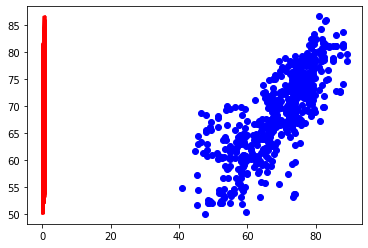

In [55]:
plt.scatter(y_test, y1_predict, color='blue')
plt.plot(x1_test, y1_predict , color='red')
plt.show()

# Data Splitting and Standardization for Group-2

In [56]:
x2 = data[group2]
y = clean_data["Life expectancy "]

x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=147)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

x2_train = scaler.fit_transform(x2_train)
x2_test = scaler.transform(x2_test)

print("x2")
print(x2)
print("x2_train")
print(x2_train)
print("x2_test")
print(x2_test)

#Linear Regression for Group-2
model2=LinearRegression() #initialize the linear regression model
model2.fit(x2_train, y_train) #fit the training data to the model (training)

print("model2.coef")
print(model2.coef_) #coeffients of the model
print("model2.intercept")
print(model2.intercept_) #intercept of the model

scaled_x2_test=scaler.transform(x2_test)
print("scaled_x2_test")
print(scaled_x2_test)

y2_predict=model2.predict(scaled_x2_test)
print(y2_predict)

y_test=np.array(y_test)
for i in range(len(y2_predict)):
    print("Predicted value of y2: ", y2_predict[i]," Actual Value of y:", y_test[i])
    
score2=model2.score(x2_test,y_test)
print("score")
print(score2)

#mean-squared error for Group-2

mse2=mean_squared_error(y_test,y2_predict)
print("mean-squared error for Group-2")
print(mse2)

#mean-absolute error for Group-2

mae2=mean_absolute_error(y_test,y2_predict)
print("mean-absolute error for Group-2")
print(mae2)

#root-mean-squared error for Group-2
rmse2= np.sqrt(mean_squared_error(y_test,y2_predict))
print("root-mean-squared error for Group-2")
print(rmse2)

#R^2 for Group-2
print("R^2")
print(r2_score(y_test,y2_predict))

print(model2.coef_)
print(model2.intercept_)




x2
      Adult Mortality   HIV/AIDS   thinness  1-19 years   thinness 5-9 years  \
0               263.0        0.1                   17.2                 17.3   
1               271.0        0.1                   17.5                 17.5   
2               268.0        0.1                   17.7                 17.7   
3               272.0        0.1                   17.9                 18.0   
4               275.0        0.1                   18.2                 18.2   
...               ...        ...                    ...                  ...   
2933            723.0       33.6                    9.4                  9.4   
2934            715.0       36.7                    9.8                  9.9   
2935             73.0       39.8                    1.2                  1.3   
2936            686.0       42.1                    1.6                  1.7   
2937            665.0       43.5                   11.0                 11.2   

      under-five deaths   infant dea

# Formula of model-2

In [57]:
#Formula of model-2
_str="y = "
for i,j in enumerate(model2.coef_):
    _str += "x_{}*{} + ".format(i, j)
_str += str(model2.intercept_)
print(_str)

y = x_0*-25.34741527682792 + x_1*-21.834222723836817 + x_2*-9.76592836077024 + x_3*-5.915612200576302 + x_4*-303.0224868893606 + x_5*301.19848113165864 + x_6*-8.598810716310686 + x_7*9.706738027972051 + 78.64384053649994


# Group-2 Linear Regression Visualization

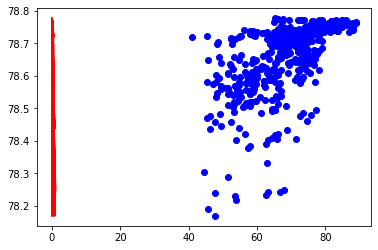

In [58]:
plt.scatter(y_test, y2_predict, color='blue')
plt.plot(x2_test, y2_predict , color='red')
plt.show()

# Data Splitting and Standardization for Group-3

In [59]:
x3 = data[group3]
y = clean_data["Life expectancy "]

x3_train, x3_test, y_train, y_test = train_test_split(x3, y, test_size=0.2, random_state=147)

scaler=MinMaxScaler(feature_range=(0,1))

x3_train = scaler.fit_transform(x3_train)
x3_test = scaler.transform(x3_test)

print("x3")
print(x3)
print("x3_train")
print(x3_train)
print("x3_test")
print(x3_test)

#Linear Regression for Group-3
model3=LinearRegression() #initialize the linear regression model
model3.fit(x3_train, y_train) #fit the training data to the model (training)

print("model3.coef")
print(model3.coef_) #coeffients of the model
print("model3.intercept")
print(model3.intercept_) #intercept of the model

scaled_x3_test=scaler.transform(x3_test)
print("scaled_x3_test")
print(scaled_x3_test)

y3_predict=model3.predict(scaled_x3_test)

y_test=np.array(y_test)
for i in range(len(y3_predict)):
    print("Predicted value of y3: ", y3_predict[i]," Actual Value of y:", y_test[i])
    
score3=model3.score(x3_test,y_test)
print("score")
print(score3)

#mean-squared error for Group-3

mse3=mean_squared_error(y_test,y3_predict)
print("mean-squared error for Group-3")
print(mse3)

#mean-absolute error for Group-3

mae3=mean_absolute_error(y_test,y3_predict)
print("mean-absolute error for Group-3")
print(mae3)

#root-mean-squared error for Group-3
rmse3= np.sqrt(mean_squared_error(y_test,y3_predict))
print("root-mean-squared error for Group-3")
print(rmse3)

#R^2 for Group-3
print("R^2")
print(r2_score(y_test,y3_predict))

print(model3.coef_)
print(model3.intercept_)


x3
      Schooling  Adult Mortality  Income composition of resources   HIV/AIDS  \
0          10.1            263.0                            0.479        0.1   
1          10.0            271.0                            0.476        0.1   
2           9.9            268.0                            0.470        0.1   
3           9.8            272.0                            0.463        0.1   
4           9.5            275.0                            0.454        0.1   
...         ...              ...                              ...        ...   
2933        9.2            723.0                            0.407       33.6   
2934        9.5            715.0                            0.418       36.7   
2935       10.0             73.0                            0.427       39.8   
2936        9.8            686.0                            0.427       42.1   
2937        9.8            665.0                            0.434       43.5   

       BMI    thinness  1-19 years  

Predicted value of y3:  64.12202981204321  Actual Value of y: 74.1
Predicted value of y3:  64.32481614219824  Actual Value of y: 74.8
Predicted value of y3:  61.01104728148076  Actual Value of y: 48.1
Predicted value of y3:  61.47912768859249  Actual Value of y: 53.2
Predicted value of y3:  62.3739503057876  Actual Value of y: 71.8
Predicted value of y3:  62.87624432940506  Actual Value of y: 74.5
Predicted value of y3:  65.0222932600715  Actual Value of y: 89.0
Predicted value of y3:  61.252855440323756  Actual Value of y: 59.1
Predicted value of y3:  60.969812341313556  Actual Value of y: 61.1
Predicted value of y3:  60.94988942532902  Actual Value of y: 51.0
Predicted value of y3:  60.14073448016172  Actual Value of y: 54.8
Predicted value of y3:  57.702797050723134  Actual Value of y: 74.0
Predicted value of y3:  61.14598654170484  Actual Value of y: 48.2
Predicted value of y3:  63.54607753455757  Actual Value of y: 74.2
Predicted value of y3:  64.56221864412436  Actual Value of y:

# Formula of model-3

In [60]:
#Formula of model-3
_str="y = "
for i,j in enumerate(model3.coef_):
    _str += "x_{}*{} + ".format(i, j)
_str += str(model3.intercept_)
print(_str)

y = x_0*17.062557491570118 + x_1*-15.928444493933311 + x_2*7.38111331554456 + x_3*-24.235776856869176 + x_4*4.135818435668496 + x_5*-1.9912440162757232 + x_6*6.405036384061529 + x_7*-8.139258966915413 + 57.10831378117011


# Group-3 Linear Regression Visualization

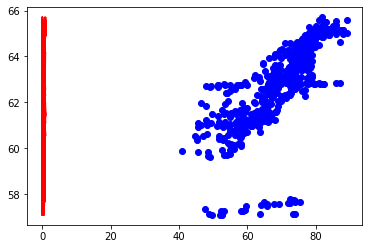

In [61]:
plt.scatter(y_test, y3_predict, color='blue')
plt.plot(x3_test, y3_predict , color='red')
plt.show()

# Data Splitting and Standardization for Group-4

In [62]:
x4 = data[group4]
y = clean_data["Life expectancy "]

x4_train, x4_test, y_train, y_test = train_test_split(x4, y, test_size=0.2, random_state=147)

scaler=MinMaxScaler(feature_range=(0,1))

x4_train = scaler.fit_transform(x4_train)
x4_test = scaler.transform(x4_test)

print("x4")
print(x4)
print("x4_train")
print(x4_train)
print("x4_test")
print(x4_test)

#Linear Regression for Group-4
model4=LinearRegression() #initialize the linear regression model
model4.fit(x4_train, y_train) #fit the training data to the model (training)

print("model4.coef")
print(model4.coef_) #coeffients of the model
print("model4.intercept")
print(model4.intercept_) #intercept of the model

scaled_x4_test=scaler.transform(x4_test)
print("scaled_x4_test")
print(scaled_x4_test)

y4_predict=model4.predict(x4_test)
print(y4_predict)

y_test=np.array(y_test)
for i in range(len(y4_predict)):
    print("Predicted value of y4: ", y4_predict[i]," Actual Value of y:", y_test[i])
    
score4=model4.score(x4_test,y_test)
print("score")
print(score4)

#mean-squared error for Group-4

mse4=mean_squared_error(y_test,y4_predict)
print("mean-squared error for Group-4")
print(mse4)

#mean-absolute error for Group-4

mae4=mean_absolute_error(y_test,y4_predict)
print("mean-absolute error for Group-4")
print(mae4)

#root-mean-squared error for Group-4
rmse4= np.sqrt(mean_squared_error(y_test,y4_predict))
print("root-mean-squared error for Group-4")
print(rmse4)

#R^2 for Group-4
print("R^2")
print(r2_score(y_test,y4_predict))

print(model4.coef_)
print(model4.intercept_)


x4
      percentage expenditure  Alcohol  Diphtheria   Polio  under-five deaths   \
0                  71.279624     0.01         65.0    6.0                  83   
1                  73.523582     0.01         62.0   58.0                  86   
2                  73.219243     0.01         64.0   62.0                  89   
3                  78.184215     0.01         67.0   67.0                  93   
4                   7.097109     0.01         68.0   68.0                  97   
...                      ...      ...          ...    ...                 ...   
2933                0.000000     4.36         65.0   67.0                  42   
2934                0.000000     4.06         68.0    7.0                  41   
2935                0.000000     4.43         71.0   73.0                  40   
2936                0.000000     1.72         75.0   76.0                  39   
2937                0.000000     1.68         78.0   78.0                  39   

      infant deaths  Mea

Predicted value of y4:  66.68864345250255  Actual Value of y: 73.2
Predicted value of y4:  68.80721733248998  Actual Value of y: 73.9
score
0.41051940876354
mean-squared error for Group-4
55.506083035595516
mean-absolute error for Group-4
5.6861553289732525
root-mean-squared error for Group-4
7.450240468306745
R^2
0.41051940876354
[  21.81970051    9.78812311    8.08974747    6.10424457 -397.0958647
  383.05259992    0.51375467   14.15341931]
54.48041710088154


# Formula of model-4

In [63]:
#Formula of model-4
_str="y = "
for i,j in enumerate(model4.coef_):
    _str += "x_{}*{} + ".format(i, j)
_str += str(model4.intercept_)
print(_str)

y = x_0*21.819700509675446 + x_1*9.788123107208383 + x_2*8.089747465461697 + x_3*6.104244567626786 + x_4*-397.0958646983125 + x_5*383.05259992185296 + x_6*0.5137546652469963 + x_7*14.15341931431125 + 54.48041710088154


# Group-4 Linear Regression Visualization

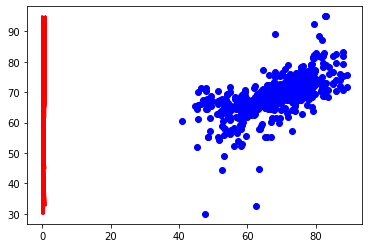

In [64]:
plt.scatter(y_test, y4_predict, color='blue')
plt.plot(x4_test, y4_predict , color='red')
plt.show()

# Data Splitting and Standardization for Group-5

In [65]:
x5 = data[group5]
y = clean_data["Life expectancy "]

x5_train, x5_test, y_train, y_test = train_test_split(x5, y, test_size=0.2, random_state=147)

scaler=MinMaxScaler(feature_range=(0,1))

x5_train = scaler.fit_transform(x5_train)
x5_test = scaler.transform(x5_test)

print("x5")
print(x5)
print("x5_train")
print(x5_train)
print("x5_test")
print(x5_test)

#Linear Regression for Group-5
model5=LinearRegression() #initialize the linear regression model
model5.fit(x5_train, y_train) #fit the training data to the model (training)

print("model5.coef")
print(model5.coef_) #coeffients of the model
print("model5.intercept")
print(model5.intercept_) #intercept of the model

scaled_x5_test=scaler.transform(x5_test)
print("scaled_x5_test")
print(scaled_x5_test)

y5_predict=model5.predict(scaled_x5_test)
print(y5_predict)

y_test=np.array(y_test)
for i in range(len(y5_predict)):
    print("Predicted value of y5: ", y5_predict[i]," Actual Value of y:", y_test[i])
    
score5=model5.score(x5_test,y_test)
print("score")
print(score5)

#mean-squared error for Group-5

mse5=mean_squared_error(y_test,y5_predict)
print("mean-squared error for Group-5")
print(mse5)

#mean-absolute error for Group-5

mae5=mean_absolute_error(y_test,y5_predict)
print("mean-absolute error for Group-5")
print(mae5)

#root-mean-squared error for Group-5
rmse5= np.sqrt(mean_squared_error(y_test,y5_predict))
print("root-mean-squared error for Group-5")
print(rmse5)

#R^2 for Group-5
print("R^2")
print(r2_score(y_test,y5_predict))

print(model5.coef_)
print(model5.intercept_)


x5
      Adult Mortality  infant deaths  Alcohol  percentage expenditure   BMI   \
0               263.0             62     0.01               71.279624   19.1   
1               271.0             64     0.01               73.523582   18.6   
2               268.0             66     0.01               73.219243   18.1   
3               272.0             69     0.01               78.184215   17.6   
4               275.0             71     0.01                7.097109   17.2   
...               ...            ...      ...                     ...    ...   
2933            723.0             27     4.36                0.000000   27.1   
2934            715.0             26     4.06                0.000000   26.7   
2935             73.0             25     4.43                0.000000   26.3   
2936            686.0             25     1.72                0.000000   25.9   
2937            665.0             24     1.68                0.000000   25.5   

      under-five deaths   Total expe

# Formula of model-5

In [66]:
#Formula of model-5
_str="y = "
for i,j in enumerate(model5.coef_):
    _str += "x_{}*{} + ".format(i, j)
_str += str(model5.intercept_)
print(_str)

y = x_0*-23.501399461555334 + x_1*258.0574749275485 + x_2*2.494859919137218 + x_3*7.314547563989142 + x_4*5.891823123366418 + x_5*-262.48595688542525 + x_6*0.6372058828314525 + x_7*20.924859039139886 + 58.990873752277835


# Group-5 Linear Regression Visualization

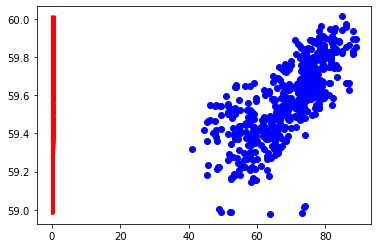

In [67]:
plt.scatter(y_test, y5_predict, color='blue')
plt.plot(x5_test, y5_predict , color='red')
plt.show()

# Overall Results

In [68]:
print("RESULTS")
print("Group-1")
print("Model-1 score: "+str(score1.round(2)))
print("MSE: "+str(mse1.round(2))+" MAE: "+str(mae1.round(2))+" RMSE: "+str(rmse1.round(2)))
print("Group-2")
print("Model-2 score: "+str(score2.round(2)))
print("MSE: "+str(mse2.round(2))+" MAE: "+str(mae2.round(2))+" RMSE: "+str(rmse2.round(2)))
print("Group-3")
print("Model-3 score: "+str(score3.round(2)))
print("MSE: "+str(mse3.round(2))+" MAE: "+str(mae3.round(2))+" RMSE: "+str(rmse3.round(2)))
print("Group-4")
print("Model-4 score: "+str(score4.round(2)))
print("MSE: "+str(mse4.round(2))+" MAE: "+str(mae4.round(2))+" RMSE: "+str(rmse4.round(2)))
print("Group-5")
print("Model-5 score: "+str(score5.round(2)))
print("MSE: "+str(mse5.round(2))+" MAE: "+str(mae5.round(2))+" RMSE: "+str(rmse5.round(2)))

RESULTS
Group-1
Model-1 score: 0.62
MSE: 35.75 MAE: 4.4 RMSE: 5.98
Group-2
Model-2 score: 0.59
MSE: 183.46 MAE: 10.47 RMSE: 13.54
Group-3
Model-3 score: 0.77
MSE: 114.04 MAE: 9.29 RMSE: 10.68
Group-4
Model-4 score: 0.41
MSE: 55.51 MAE: 5.69 RMSE: 7.45
Group-5
Model-5 score: 0.72
MSE: 183.03 MAE: 11.76 RMSE: 13.53
